# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

# Data preparation and cleansing
## Import neccessary packages

Although in Python we can import packages anywhere we want, as long as it's prior the use, it'd be better to keep all of neccessary packages in one place. It's easer for reference.

In [1]:
%pip install catboost xgboost optuna pydotplus six

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## i love this function, it helps me to determine if a column is numeric or not. Why didn't I find it earlier
from pandas.api.types import is_numeric_dtype 

import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, 
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

from sklearn.metrics import plot_roc_curve


from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)

# I would like to see all the detail info in info() or describe()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Exploratory Data Analysis
### Import dataset from current working folder


In [3]:
df = pd.read_csv("train (1).csv")
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
df.shape

(69999, 172)

In [6]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [7]:
df.describe(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,69999,69600,69266,68898,68765,67538,17568,17865,18417
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324,1317,1282,1388


### Handling nulls value

In [8]:
total = df.shape[0]

## using for loop to determine missing value in each columns in the dataset
missing_columns = [col for col in df.columns if df[col].isnull().sum() >= 0]
missing_columns

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [9]:
total = df.shape[0]

## using for loop to determine missing value in each columns in the dataset
missing_columns = [col for col in df.columns if df[col].isnull().sum() >= 0]

## this list contains the final columns after dropping all-null-value columns
final_columns = []

## using for loop to calculate % of null values in each columns.
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")
    
    ## if null percentage is less than 10%, those columns are kept in the final list
    ## detail rationale will be described in the result and below text.
    if per < 10:
        final_columns.append(col)

id: 0 (0.0%)
circle_id: 0 (0.0%)
loc_og_t2o_mou: 702 (1.003%)
std_og_t2o_mou: 702 (1.003%)
loc_ic_t2o_mou: 702 (1.003%)
last_date_of_month_6: 0 (0.0%)
last_date_of_month_7: 399 (0.57%)
last_date_of_month_8: 733 (1.047%)
arpu_6: 0 (0.0%)
arpu_7: 0 (0.0%)
arpu_8: 0 (0.0%)
onnet_mou_6: 2768 (3.954%)
onnet_mou_7: 2687 (3.839%)
onnet_mou_8: 3703 (5.29%)
offnet_mou_6: 2768 (3.954%)
offnet_mou_7: 2687 (3.839%)
offnet_mou_8: 3703 (5.29%)
roam_ic_mou_6: 2768 (3.954%)
roam_ic_mou_7: 2687 (3.839%)
roam_ic_mou_8: 3703 (5.29%)
roam_og_mou_6: 2768 (3.954%)
roam_og_mou_7: 2687 (3.839%)
roam_og_mou_8: 3703 (5.29%)
loc_og_t2t_mou_6: 2768 (3.954%)
loc_og_t2t_mou_7: 2687 (3.839%)
loc_og_t2t_mou_8: 3703 (5.29%)
loc_og_t2m_mou_6: 2768 (3.954%)
loc_og_t2m_mou_7: 2687 (3.839%)
loc_og_t2m_mou_8: 3703 (5.29%)
loc_og_t2f_mou_6: 2768 (3.954%)
loc_og_t2f_mou_7: 2687 (3.839%)
loc_og_t2f_mou_8: 3703 (5.29%)
loc_og_t2c_mou_6: 2768 (3.954%)
loc_og_t2c_mou_7: 2687 (3.839%)
loc_og_t2c_mou_8: 3703 (5.29%)
loc_og_mou_6: 

From the result above, we can see there are two type of missing values:
* Missing less than 5% of data
* Missing about 75% of data

I think it's safe to remove all columns missing 75% of data. From now on, those columns are removed.

In [10]:
## from my past experiences, we shouldn't overwrite the old data frame.
## if we really want to, just create a new data frame for each step.
new_df = df[final_columns]

In [11]:
new_df.shape

(69999, 142)

18% columns are dropped, perhaps it's not a wise choice now. After the data model is built, if the result is not good, we'll get back to this section again. Remaining columns are examined columns type. Based on each columns type, different data imputing methods are required.

In [12]:
columns_name = new_df.columns
columns_type = new_df.dtypes

records = []
for i in range(len(columns_name)):
    records.append([columns_name[i], columns_type[i]])
    
new_df_meta_data = pd.DataFrame(records, columns=['column_name', 'column_type'])

pd.pivot_table(new_df_meta_data
               , index = "column_type"
               , aggfunc=['count'] 
              )

,count
,column_name
column_type,
int64,28
float64,108
object,6


Great, there are only float and object. 
* int64, float64: will be imputed using median.
* object: will be imputed using mode.

#### Imputing numeric columns using median

In [13]:
numeric_columns = new_df.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in numeric_columns:
    new_df[col].fillna(new_df[col].median(), inplace=True)

In [14]:
new_df = new_df[numeric_columns]

### Outlier treatment
#### Dropping outliers using quantiles.
Extreme values are considered outliers and should be removed before hand. To make sure, we should draw histograms to see if there are any outliers

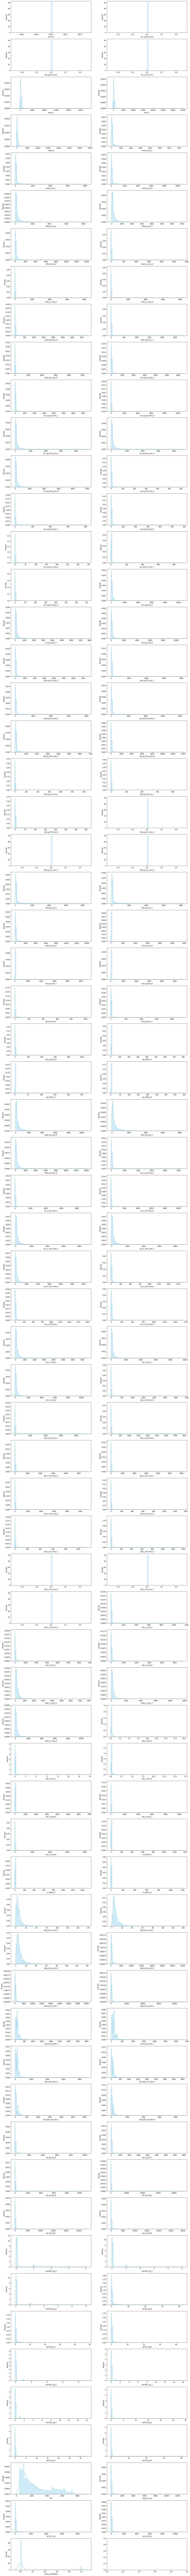

In [15]:
a = int(round(len(numeric_columns) / 2, 0)) 

f, axes = plt.subplots(a, 2, figsize=(20,300), sharex=False)
idx, idy = 0, 0

for i in range(1, len(new_df.columns)):
    if is_numeric_dtype(new_df.iloc[:,i]):
        plot = sns.distplot(x=new_df.iloc[:,i], color="skyblue", ax=axes[idx, idy])
        plot.set(xlabel=new_df.columns[i])
        idx += idy
        idy = int(not idy)
plt.show()

Base on above charts, there are clearly some columns that can be dropped, because they have only one value, which is 0:
* std_og_t2o_mou
* loc_ic_t2o_mou
* std_og_t2c_mou_6
* std_og_t2c_mou_7
* std_og_t2c_mou_8
* std_ic_t2o_mou_6
* std_ic_t2o_mou_7
* std_ic_t2o_mou_8

In [16]:
## creating a new variables for columns with all zero values
columns_zero_values = ['std_og_t2o_mou'
                       , 'loc_ic_t2o_mou'
                       , 'std_og_t2c_mou_6'
                       , 'std_og_t2c_mou_7'
                       , 'std_og_t2c_mou_8'
                       , 'std_ic_t2o_mou_6'
                       , 'std_ic_t2o_mou_7'
                       , 'std_ic_t2o_mou_8'
                      ]

In [17]:
## drop those columns from final dataset

new_df.drop(columns_zero_values, inplace=True, axis=1)

According to all above histograms, our data is right skew, as a matter of fact, it's common sense for transaction data. To remove outliers, we can just remove data from the right tail. 

In [18]:
# numeric_columns variable is reused from previous section, which is imputing numeric columns using median.
numeric_columns = new_df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# initially, I want to remove 5% data from the right, but it will remove more than 55% of data.
# after a few attemps, threshold 1% is good enough.
max_threshold = 0.99
min_threshod = 0

col_with_min_threshold = new_df[numeric_columns].quantile(min_threshod)
col_with_max_threshold = new_df[numeric_columns].quantile(max_threshold)

# calculating the range from min to max
in_use_range = col_with_max_threshold - col_with_min_threshold

# all data beyond that range are removed. 
# new dataset after_outliers is created to reserve new_df (containing data after imputing data)
after_outliers = new_df[~((new_df[numeric_columns] < (col_with_min_threshold - (1-min_threshod) * in_use_range)) |(new_df[numeric_columns] > (col_with_max_threshold + (1-min_threshod) * in_use_range))).any(axis=1)]


In [19]:
print("Shape of data before removing outliers: ", new_df.shape)
print("Shape of data before removing outliers: ", after_outliers.shape)

Shape of data before removing outliers:  (69999, 128)
Shape of data before removing outliers:  (61359, 128)


In [20]:
# a = after_outliers.apply(pd.Series.nunique) / after_outliers.shape[0]

# print("Min percentage of unique values:", a.min())
# print("First quantile percentage of unique values:", a.quantile(0.25))
# print("Median percentage of unique values:", a.quantile(0.5))
# print("Mean percentage of unique values:", a.quantile(0.5))
# print("Third quantile percentage of unique values:", a.quantile(0.75))
# print("Max percentage of unique values:", a.max())

In [21]:
# less_unique_value_columns = a[a < a.quantile(0.25)].index

In [22]:
# after_outliers.drop(less_unique_value_columns, inplace=True, axis=1)

In [23]:
# after_outliers.shape

In [24]:
# after_outliers.columns

# Model building
Following algorithms are attempted to see the best fit model:
* Logistic regression using Lasso for feature selection
* Decision tree
* Random forest
* Gradient Boosting
* XGBoosting

Whichever algorithm is chosen, the preparation steps are similar. Therefore, all those steps are prepared before hand.

## Spliting data to train and test set

In [287]:
x = after_outliers.drop(["id", "circle_id", "churn_probability"], axis = 1)
y = after_outliers.churn_probability

In [288]:
np.random.seed(1309) ## it's my favorite to use current date as seed :D

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(x
#                                                     , y
#                                                     , train_size=0.7
#                                                     , test_size = 0.3
#                                                     , random_state=100
#                                                    )

Let's check if the size of train and test dataset are 70% and 30%

In [289]:
print("Size of X_train is: ", len(x_train))
print("Size of y_train is: ", len(y_train))

print("Size of X_test is: ", len(x_test))
print("Size of y_test is: ", len(y_test))

Size of X_train is:  46019
Size of y_train is:  46019
Size of X_test is:  15340
Size of y_test is:  15340


It seems the split work well

In [290]:
## this variable contains all model evaluation result
model_evaluation = []

## List of algorithm
### Logistic regression

In [291]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [30]:
## Calculataing accuracy

print(f"Training Score: {lg_model.score(x_train , y_train)}")
print(f"Test Score: {lg_model.score(x_test , y_test)}")

Training Score: 0.9321149959799213
Test Score: 0.9301173402868318


In [31]:
## Preparing confusion matrix

y_pred_lg = lg_model.predict(x_test)

cm_lg = confusion_matrix(y_test, y_pred_lg)
print('The confusion Matrix : \n',cm_lg)

FPR_lg = cm_lg[1,0] / (cm_lg[1,0] + cm_lg[1,1])
print("False positive rate", FPR_lg)

TPR_lg = cm_lg[0, 0] / (cm_lg[0, 0] + cm_lg[0, 1])
print("True positive rate", TPR_lg)

TNR_lg = cm_lg[1,1] / (cm_lg[1,0] + cm_lg[1,1])
print("True negative rate", TNR_lg)

The confusion Matrix : 
 [[13584   218]
 [  854   684]]
False positive rate 0.5552665799739922
True positive rate 0.9842051876539631
True negative rate 0.4447334200260078


In [32]:
model_evaluation.append(["Logistic regression", lg_model.score(x_train , y_train), lg_model.score(x_test , y_test), TPR_lg, FPR_lg, TNR_lg])

### Decision tree

In [33]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 22, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [34]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=16, values=[0.9411994784876141], datetime_start=datetime.datetime(2022, 9, 13, 23, 32, 55, 861316), datetime_complete=datetime.datetime(2022, 9, 13, 23, 32, 56, 84891), params={'dt_max_depth': 7, 'dt_max_features': 19}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=22, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=16, state=TrialState.COMPLETE, value=None)


In [35]:
## Calculataing accuracy

dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)
print(f"Train Score: {dt.score(x_train, y_train)}")
print(f"Test Score: {dt.score(x_test, y_test)}")

Train Score: 0.944044851039788
Test Score: 0.9386571056062581


In [36]:
## Preparing confusion matrix

y_pred_dt = dt.predict(x_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print('The confusion Matrix : \n',cm_dt)

FPR_dt = cm_dt[1,0] / (cm_dt[1,0] + cm_dt[1,1])
print("False positive rate", FPR_dt)

TPR_dt = cm_dt[0, 0] / (cm_dt[0, 0] + cm_dt[0, 1])
print("True positive rate", TPR_dt)

TNR_dt = cm_dt[1,1] / (cm_dt[1,0] + cm_dt[1,1])
print("True negative rate", TNR_dt)

The confusion Matrix : 
 [[13505   297]
 [  644   894]]
False positive rate 0.4187256176853056
True positive rate 0.978481379510216
True negative rate 0.5812743823146944


In [37]:
model_evaluation.append(["Decision tree", dt.score(x_train, y_train), dt.score(x_test, y_test), TPR_dt, FPR_dt, TNR_dt])

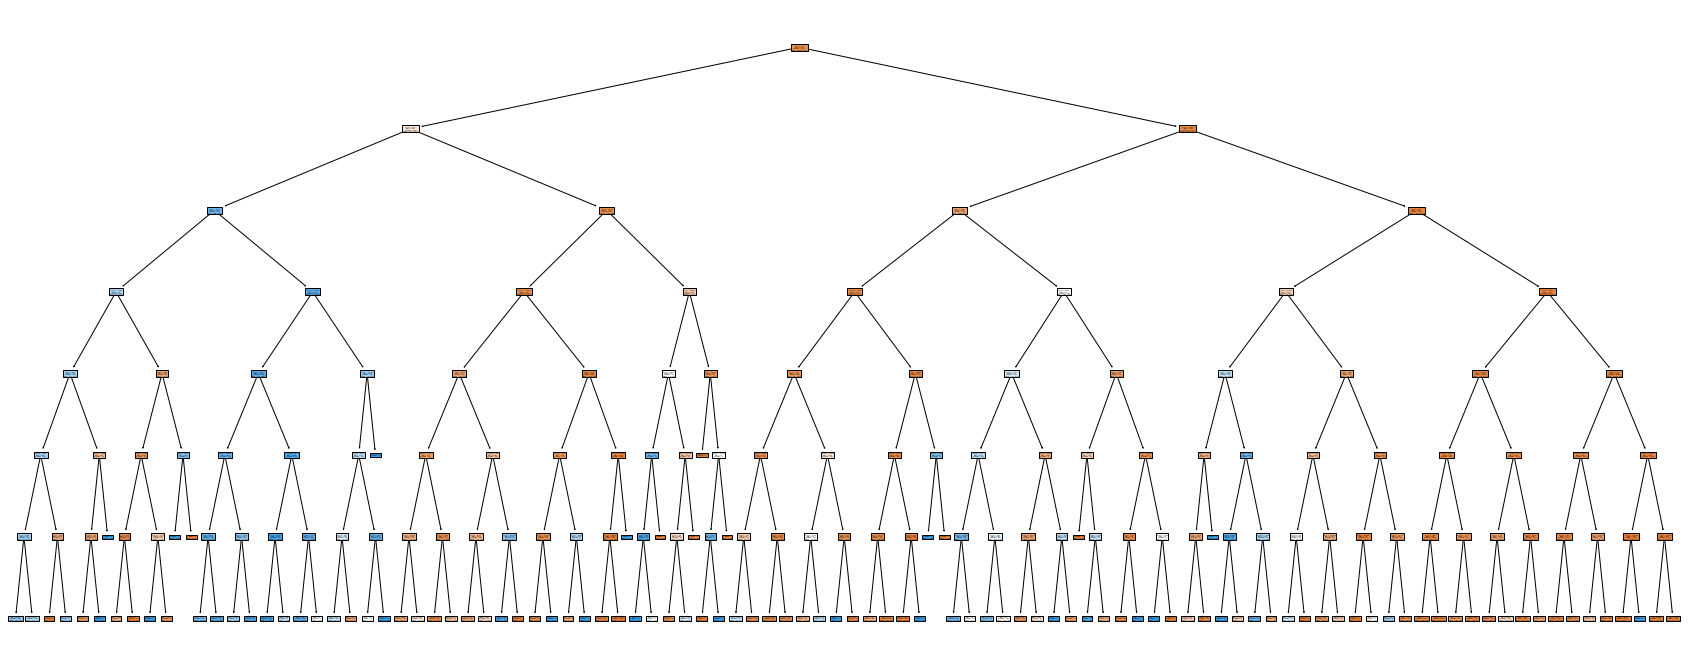

In [38]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

### Random Forest Classifier

In [44]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 22, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [45]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=21, values=[0.9421773142112125], datetime_start=datetime.datetime(2022, 9, 14, 0, 3, 8, 452320), datetime_complete=datetime.datetime(2022, 9, 14, 0, 3, 11, 639525), params={'rf_max_depth': 8, 'rf_max_features': 22, 'rf_n_estimators': 18}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=22, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=21, state=TrialState.COMPLETE, value=None)


In [46]:
## Calculataing accuracy

rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features']
                            , max_depth = study_rf.best_trial.params['rf_max_depth']
                            , n_estimators = study_rf.best_trial.params['rf_n_estimators']
                           )
rf.fit(x_train, y_train)

print(f"Train Score: {rf.score(x_train, y_train)}")
print(f"Test Score: {rf.score(x_test, y_test)}")

Train Score: 0.9472391838153806
Test Score: 0.9419165580182529


In [47]:
## Preparing confusion matrix

y_pred_rf = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('The confusion Matrix : \n',cm_rf)

FPR_rf = cm_rf[1,0] / (cm_rf[1,0] + cm_rf[1,1])
print("False positive rate", FPR_rf)

TPR_rf = cm_rf[0, 0] / (cm_rf[0, 0] + cm_rf[0, 1])
print("True positive rate", TPR_rf)

TNR_rf = cm_rf[1,1] / (cm_rf[1,0] + cm_rf[1,1])
print("True negative rate", TNR_rf)

The confusion Matrix : 
 [[13515   287]
 [  604   934]]
False positive rate 0.39271781534460337
True positive rate 0.9792059121866397
True negative rate 0.6072821846553966


In [48]:
model_evaluation.append(["Random Forest Classifier", rf.score(x_train, y_train), rf.score(x_test, y_test), TPR_rf, FPR_rf, TNR_rf])

### Gradient Boosting

In [49]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [146]:
## Calculataing accuracy

print(f"Training Score: {clf.score(x_train , y_train)}")
print(f"Test Score: {clf.score(x_test , y_test)}")

Training Score: 0.9452400095612682
Test Score: 0.9415254237288135


In [51]:
## Preparing confusion matrix

y_pred_gb = clf.predict(x_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print('The confusion Matrix : \n',cm_gb)

FPR_gb = cm_gb[1,0] / (cm_gb[1,0] + cm_gb[1,1])
print("False positive rate", FPR_gb)

TPR_gb = cm_gb[0, 0] / (cm_gb[0, 0] + cm_gb[0, 1])
print("True positive rate", TPR_gb)

TNR_gb = cm_gb[1,1] / (cm_gb[1,0] + cm_gb[1,1])
print("True negative rate", TNR_gb)

The confusion Matrix : 
 [[13476   326]
 [  571   967]]
False positive rate 0.3712613784135241
True positive rate 0.9763802347485872
True negative rate 0.628738621586476


In [52]:
model_evaluation.append(["Gradient Boosting", clf.score(x_train , y_train), clf.score(x_test , y_test), TPR_gb, FPR_gb, TNR_gb])

### XGBoosting

In [53]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
## Calculataing accuracy

print(f"Training Score: {xgb_model.score(x_train , y_train)}")
print(f"Test Score: {xgb_model.score(x_test , y_test)}")


Training Score: 0.9797257654447076
Test Score: 0.9405475880052151


In [55]:
## Preparing confusion matrix

y_pred_xgb = xgb_model.predict(x_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print('The confusion Matrix : \n',cm_xgb)

FPR_xgb = cm_xgb[1,0] / (cm_xgb[1,0] + cm_xgb[1,1])
print("False positive rate", FPR_xgb)

TPR_xgb = cm_xgb[0, 0] / (cm_xgb[0, 0] + cm_xgb[0, 1])
print("True positive rate", TPR_xgb)

TNR_xgb = cm_xgb[1,1] / (cm_xgb[1,0] + cm_xgb[1,1])
print("True negative rate", TNR_xgb)

The confusion Matrix : 
 [[13470   332]
 [  580   958]]
False positive rate 0.37711313394018203
True positive rate 0.975945515142733
True negative rate 0.6228868660598179


In [56]:
model_evaluation.append(["XGBoosting", xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test), TPR_xgb, FPR_xgb, TNR_xgb])

### AdaBoost

In [57]:
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [58]:
## Calculataing accuracy

print(f"Training Score: {ab_model.score(x_train , y_train)}")
print(f"Test Score: {ab_model.score(x_test , y_test)}")

Training Score: 0.9405897564049631
Test Score: 0.9387874837027379


In [59]:
## Preparing confusion matrix

y_pred_xgb = ab_model.predict(x_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print('The confusion Matrix : \n',cm_xgb)

FPR_xgb = cm_xgb[1,0] / (cm_xgb[1,0] + cm_xgb[1,1])
print("False positive rate", FPR_xgb)

TPR_xgb = cm_xgb[0, 0] / (cm_xgb[0, 0] + cm_xgb[0, 1])
print("True positive rate", TPR_xgb)

TNR_xgb = cm_xgb[1,1] / (cm_xgb[1,0] + cm_xgb[1,1])
print("True negative rate", TNR_xgb)

The confusion Matrix : 
 [[13469   333]
 [  606   932]]
False positive rate 0.3940182054616385
True positive rate 0.9758730618750906
True negative rate 0.6059817945383615


In [60]:
model_evaluation.append(["AdaBoost", ab_model.score(x_train , y_train), ab_model.score(x_test , y_test), TPR_xgb, FPR_xgb, TNR_xgb])

## Model selection

In [61]:
pd.DataFrame(model_evaluation
             , columns=['Algorithm', 'Training Score', 'Test score', 'True Positive rate', 'False Positive rate', 'True negative rate']
            ).sort_values(by=["Training Score", "Test score"], ascending=False) 

,Algorithm,Training Score,Test score,True Positive rate,False Positive rate,True negative rate
4,XGBoosting,0.979726,0.940548,0.975946,0.377113,0.622887
2,Random Forest Classifier,0.947239,0.941917,0.979206,0.392718,0.607282
3,Gradient Boosting,0.945240,0.941525,0.976380,0.371261,0.628739
1,Decision tree,0.944045,0.938657,0.978481,0.418726,0.581274
5,AdaBoost,0.940590,0.938787,0.975873,0.394018,0.605982
0,Logistic regression,0.932115,0.930117,0.984205,0.555267,0.444733


Gradient Boosting is chosen as the final model, because 
* the accuracy is stable across training and test dataset
* the false positive rate is the lowest
* the true negative rate is the highest ==> this model may be useful to detect user least likely to churn too.
* all algorithms give simiar true positive rate, so this metric is not in consideration.

# Model evaluation on actual data

In [137]:
## actual dataset
test_df = pd.read_csv("test (1).csv")

## solution dataset
solution_df = pd.read_csv("solution (1).csv")

In [64]:
test_df

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/201

In [138]:
solution_df

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


## Data preparation on actual data

Because the final model doesn't use all columns in train dataset, the actual dataset needs to have similar columns too. 

In [139]:
## create a new variable so-called actual dataset based on train dataset.
actual_df = test_df[x.columns.tolist()]

In [130]:
actual_df

,loc_og_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,48.93,7.68,28.48,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.00,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84
3,0.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.00,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.00,0.0,37.09,96.53,0.00,0.00,0.00,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88

## Imputing nulls values on actual data

GradientBoostingClassifier doesn't accept missing values encoded as NaN natively. Those missing values must be imputed in the same treatment that we did for train dataset.

In [179]:
numeric_columns = actual_df.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in numeric_columns:
    actual_df[col].fillna(actual_df[col].median(), inplace=True)

## Applying model on actual data

Here are following steps are done shortly
1. Predict on test data set (file name test (1).csv)
    * At the end of this step, we'll get churn prediction for each observation
2. Calculating confusion matrix using two columns
    * churn_probability in result dataset (file name solution (1).csv
    * churn prediction from step 1
3. Comparing the confusion matrix in this test dataset with the one we got in model building section
    * if there is similar, we can conclude our model is robust

In [198]:
y_pred_actual = clf.predict(actual_df)

In [202]:
## adding predicted data to solution dataset

solution_df['predicted_label'] = pd.Series(y_pred_actual)

In [203]:
solution_df

,id,churn_probability,predicted_label
0,69999,0,0
1,70000,0,0
2,70001,1,1
3,70002,0,0
4,70003,0,0
...,...,...,...
29995,99994,0,0
29996,99995,0,0
29997,99996,0,0
29998,99997,0,0


In [221]:
cm_gb_v2 = confusion_matrix(solution_df["churn_probability"].to_numpy(), y_pred_actual)
print('The confusion Matrix : \n',cm_gb_v2)

FPR_gb_v2 = cm_gb_v2[1,0] / (cm_gb_v2[1,0] + cm_gb_v2[1,1])
print("False positive rate", FPR_gb_v2)

TPR_gb_v2 = cm_gb_v2[0, 0] / (cm_gb_v2[0, 0] + cm_gb_v2[0, 1])
print("True positive rate", TPR_gb_v2)

TNR_gb_v2 = cm_gb_v2[1,1] / (cm_gb_v2[1,0] + cm_gb_v2[1,1])
print("True negative rate", TNR_gb_v2)

print("True accuracy rate", accuracy_score(solution_df["churn_probability"].to_numpy(), y_pred_actual))

The confusion Matrix : 
 [[26148   793]
 [ 1080  1979]]
False positive rate 0.35305655442955214
True positive rate 0.9705653093797557
True negative rate 0.6469434455704478
True accuracy rate 0.9375666666666667


**Let's recap the confusion matrix during model building**

In [219]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print('The confusion Matrix : \n',cm_gb)

FPR_gb = cm_gb[1,0] / (cm_gb[1,0] + cm_gb[1,1])
print("False positive rate", FPR_gb)

TPR_gb = cm_gb[0, 0] / (cm_gb[0, 0] + cm_gb[0, 1])
print("True positive rate", TPR_gb)

TNR_gb = cm_gb[1,1] / (cm_gb[1,0] + cm_gb[1,1])
print("True negative rate", TNR_gb)

print(f"Training Score: {clf.score(x_train , y_train)}")
print(f"Test Score: {clf.score(x_test , y_test)}")

The confusion Matrix : 
 [[13476   326]
 [  571   967]]
False positive rate 0.3712613784135241
True positive rate 0.9763802347485872
True negative rate 0.628738621586476
Training Score: 0.9452400095612682
Test Score: 0.9415254237288135


The drop in all compared metrics on test data set is not significant, so we can conclude the model is robust.

## Identifying significant features

In [224]:
clf.feature_importances_

array([0.00000000e+00, 1.79260628e-03, 1.23961305e-03, 1.49250688e-02,
       7.17002487e-05, 2.52094989e-04, 1.98281647e-04, 0.00000000e+00,
       6.61769120e-04, 2.65983503e-04, 1.44950112e-04, 7.47849114e-04,
       3.67354275e-03, 6.05126642e-04, 2.40207073e-03, 3.01867740e-02,
       8.20961405e-05, 1.39279042e-04, 2.65826170e-04, 7.59758833e-05,
       0.00000000e+00, 1.51383195e-08, 0.00000000e+00, 6.68647090e-04,
       6.51514613e-05, 1.44422071e-04, 1.96707820e-04, 1.42326590e-04,
       0.00000000e+00, 3.35739900e-04, 1.43254594e-04, 4.21999319e-04,
       3.11758809e-04, 8.58859822e-05, 0.00000000e+00, 3.20612831e-04,
       1.42138153e-04, 1.65449334e-04, 0.00000000e+00, 0.00000000e+00,
       2.72335143e-04, 6.71890477e-03, 4.87794730e-07, 3.42142593e-05,
       2.60265811e-04, 2.38768450e-04, 0.00000000e+00, 3.69636287e-04,
       4.92308649e-05, 2.18800403e-04, 0.00000000e+00, 0.00000000e+00,
       1.76889414e-03, 6.60810565e-04, 9.07238869e-03, 0.00000000e+00,
      

In [271]:
significant_features = [] ## this empty list contains significant features shortly

## iterate over the list of feature importances
## if an item returns 0, the item is insignificant
for i in range(len(clf.feature_importances_)):
    if clf.feature_importances_[i] > 0:
        significant_features.append(i)

In [270]:
significant_features

[1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 52,
 53,
 54,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 112,
 114,
 118,
 119,
 121,
 122,
 124]

In [276]:
## list of significant features

actual_df.columns[significant_features].to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',


In [277]:
solution_df.to_csv("Submission.csv")